# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# List to hold responses (storing name, lat dups for simplicity of moving into dictionary)
city_num = []
city_name = []
lat = []
temp = []
humidity = []
clouds = []
wind_speed = []

# Loop through cities list to perform a request for info on each
for city in cities:
    
    # Create query, make request, and store in json
    weather_response = requests.get(query_url + city).json()
    
    # Grab data where available
    try:
        city_num.append(weather_response['id'])
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        temp.append(weather_response['main']['temp'])
        humidity.append(weather_response['main']['humidity'])
        clouds.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
    
    # If any fields are blank, do not append to lists
    except:
        pass
    
    # Add 5 second interval between queries to stay within API query limits
    time.sleep(5)

# Print log
print(f"The weather API responded with: {city_num},{city_name}.")

The weather API responded with: [3369157, 2017155, 4031637, 2075265, 3402648, 3874787, 4032243, 6201424, 2510075, 2015306, 3576994, 2108502, 1486321, 3439525, 3663142, 933995, 1816336, 1629965, 3448903, 2396853, 1651810, 3420768, 6185377, 935215, 2961459, 2109701, 2264557, 4030556, 2939623, 2632287, 3833367, 5866583, 1633419, 5855927, 1633034, 2110227, 1337607, 139889, 1684803, 212730, 3471451, 5880054, 3382226, 1735106, 964432, 6062069, 1490918, 2155415, 1637001, 480267, 2122090, 3439389, 3403395, 3430863, 5122534, 2136825, 5364271, 1495626, 1254046, 3440777, 3984997, 1737486, 3424607, 3995236, 214575, 3374210, 2304548, 2163355, 5848280, 1337619, 3083829, 2618795, 3839307, 5106841, 2177254, 3466165, 2068655, 3361934, 4033557, 3421765, 2070998, 3372707, 2392087, 2126199, 1514792, 1006984, 3393536, 3120811, 2122493, 2093967, 4272340, 2331939, 2126123, 546105, 5882953, 1491267, 5282297, 4034551, 2138555, 5095779, 3366880, 5797693, 2206939, 3389822, 2729907, 1510689, 3466980, 3894426, 402

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dictionary to hold response data for conversion into dataframe
weather_dict = {
    "city id": city_num,
    "city": city_name,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": clouds,
    "wind speed": wind_speed    
}

# Create dataframe
cities_df = pd.DataFrame(weather_dict)

# Display dataframe
cities_df.head()

,city id,city,lat,temp,humidity,cloudiness,wind speed
0,3369157,Cape Town,-33.9258,19.53,88,0,5.14
1,2017155,Saskylakh,71.9167,-30.54,83,0,3.03
2,4031637,Lavrentiya,65.5833,-32.10,80,0,4.15
3,2075265,Busselton,-33.6500,17.71,68,61,0.89
4,3402648,Carutapera,-1.1950,25.87,83,100,2.75


In [5]:
cities_df.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Import cities.csv so API doesn't need to be called again to work with data
final_cities = "cities.csv"

final_cities_df = pd.read_csv(final_cities)
final_cities_df.drop(["Unnamed: 0"], axis=1, inplace=True)

final_cities_df.head()

,city id,city,lat,temp,humidity,cloudiness,wind speed
0,3369157,Cape Town,-33.9258,19.53,88,0,5.14
1,2017155,Saskylakh,71.9167,-30.54,83,0,3.03
2,4031637,Lavrentiya,65.5833,-32.10,80,0,4.15
3,2075265,Busselton,-33.6500,17.71,68,61,0.89
4,3402648,Carutapera,-1.1950,25.87,83,100,2.75


In [20]:
# Get the indices of cities that have humidity over 100%.
humidity_error = final_cities_df.loc[final_cities_df["humidity"] > 100]
humidity_error

,city id,city,lat,temp,humidity,cloudiness,wind speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

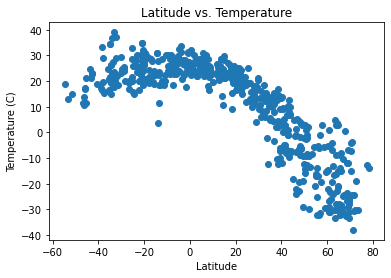

In [25]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,3])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature")
plt.show()

## Latitude vs. Humidity Plot

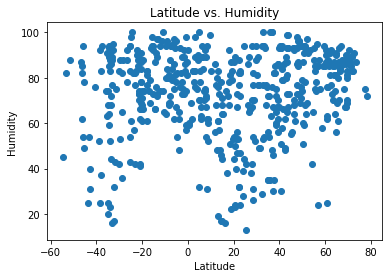

In [26]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,4])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

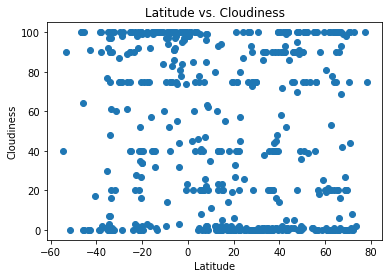

In [27]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,5])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

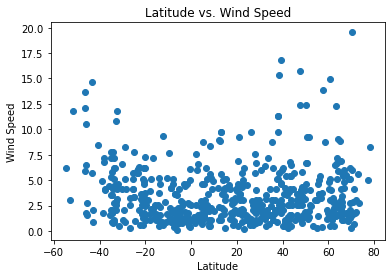

In [28]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,6])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [34]:
# Create northern hemisphere dataframe
northern_hem = final_cities_df[["city id", "city", "lat", "temp", "humidity", "cloudiness",
                                "wind speed"]].loc[(final_cities_df["lat"] >= 0)]

# Create southern hemisphere dataframe
southern_hem = final_cities_df[["city id", "city", "lat", "temp", "humidity", "cloudiness",
                                "wind speed"]].loc[(final_cities_df["lat"] <= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

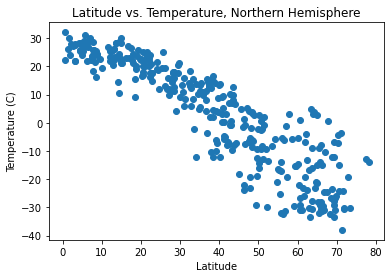

In [32]:
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,3])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature, Northern Hemisphere")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

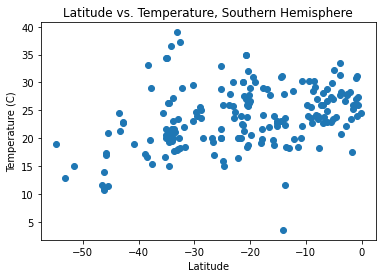

In [35]:
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,3])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature, Southern Hemisphere")
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

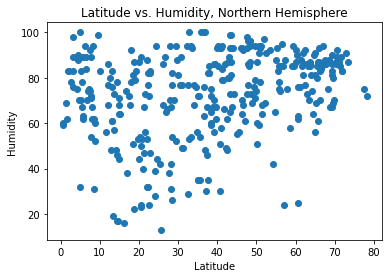

In [36]:
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,4])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity, Northern Hemisphere")
plt.show()




####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

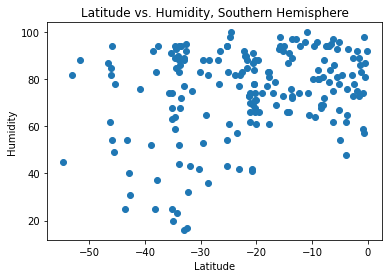

In [37]:
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,4])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity, Southern Hemisphere")
plt.show()




####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

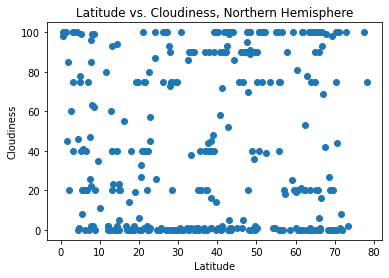

In [38]:
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,5])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness, Northern Hemisphere")
plt.show()




####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

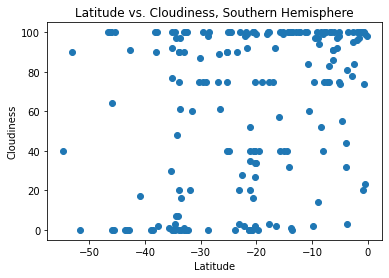

In [39]:
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,5])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness, Southern Hemisphere")
plt.show()




####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

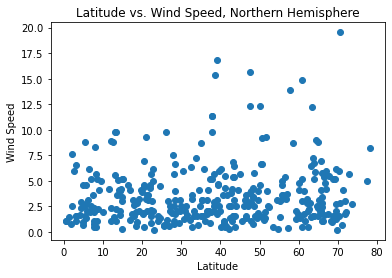

In [40]:
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,6])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed, Northern Hemisphere")
plt.show()




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

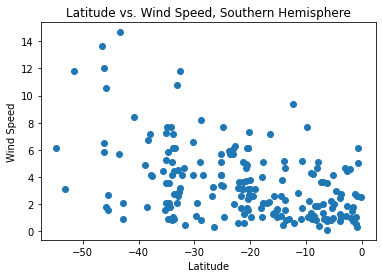

In [41]:
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,6])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed, Southern Hemisphere")
plt.show()


